## Capstone Stock Market Analysis Project - Part I

This capstone project is part of a Python course for Financial Analysis taught by Jose Portilla. As a Financial Analyst professional and Python enthusiast, I highly recommend this program.

Here is the access to further information about the course and its instructor:
- [Course: Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/course/python-for-finance-and-trading-algorithms/)
- [Instructor: Jose Portilla](https://www.udemy.com/course/python-for-finance-and-trading-algorithms/#instructor-1)

The code will be divided in parts due to the depth and breadth of the study.  

---

#### Description

"*Welcome to your first capstone project! This project is meant to cap off the first half of the course, which mainly dealt with learning the libraries that we use in this course, the second half of the course will deal a lot more with quantitative trading techniques and platforms.*

*We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here.*"

---

#### 0) Importing the relevant libraries for the analysis

*Import the various libraries you will need-you can always just come back up here or import as you go along.*

In [45]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 8]
from datetime import date, timedelta
from pandas.plotting import scatter_matrix

import quantstats as qs
qs.extend_pandas()

from prettytable import PrettyTable

import warnings 
warnings.filterwarnings('ignore')
import emoji


---

#### I) Getting the Data

*Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017 (time window will be extended to Oct 22, 2021 in order to provide a timely study).*

In [46]:
# Extracting all price columns (OHLC) of Tesla Stock (TSLA) from Yahoo Finance API
d1 = date.today() - timedelta(days = 1)
last = d1.strftime("%Y/%m/%d") # Estabelecendo a data final móvel (ontem)

tsla = wb.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = last)

tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450


*Repeat the same steps to grab data for Ford and GM (General Motors).*

In [47]:
# Same Process for Ford (F)
ford = wb.DataReader('F', data_source = 'yahoo', start = '2012-01-01', end = last)

ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.506940
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.621601
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.817199
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.898140
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.958842


In [48]:
# Finally, General Motos (GM)
gm = wb.DataReader('GM', data_source = 'yahoo', start = '2012-01-01', end = last)

gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269409
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135050
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


---

#### II) Visualizing the Data

*Follow along and recreate the plots below according to the instructions and explanations* (some charts will be plotted in a different manner).

In [49]:
# Establishing colors that will be presented for each stock according to the brand

tesla_color = '#e82127'
ford_color = '#5c93cc'
gm_color = '#0e3e92'

Plotting each stock's close price trajectory throughout the period. Normalization allows for proper comparison between the assets.

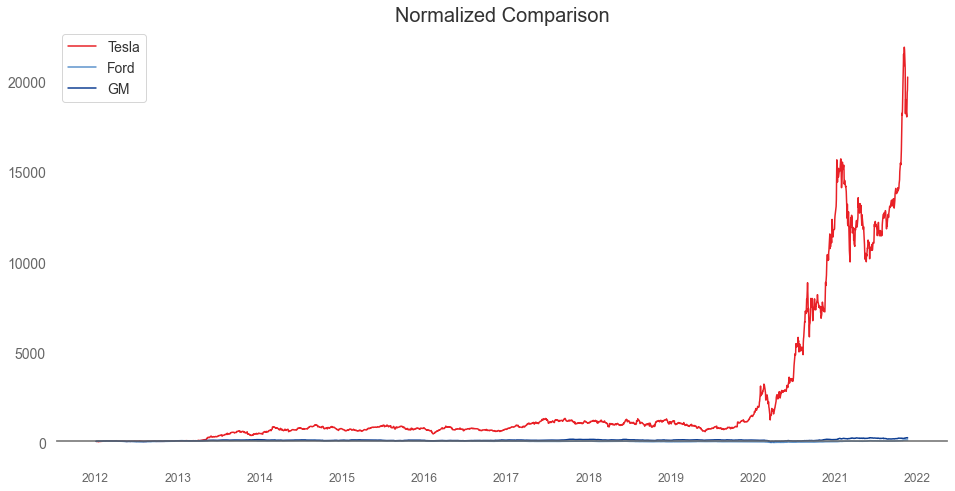

In [50]:
# Normalization scale for each stock
tsla_open_norm = (tsla['Close']/tsla['Close'].iloc[0]) * 100
ford_open_norm = (ford['Close']/ford['Close'].iloc[0]) * 100
gm_open_norm = (gm['Close']/gm['Close'].iloc[0]) * 100

# Plotting the comparison
plt.plot(tsla_open_norm, color = tesla_color)
plt.plot(ford_open_norm, color = ford_color)
plt.plot(gm_open_norm, color = gm_color)

plt.title('Normalized Comparison', size = 20)
plt.axhline(100, color = 'dimgray')
plt.legend({'Tesla': tsla_open_norm, 'Ford': ford_open_norm, 'GM': gm_open_norm}, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(color = 'dimgray')
plt.grid(False)

plt.show()

Tesla os SpaceX? From 2020 onwards, the car company's stock went up like a rocket, extremely diverging from Ford and General Motors, representatives of a more traditional business model. Due to the normalization procedure, we can barely see the perfomance of Ford an GM stocks.

Let's exclude Tesla for a moment.

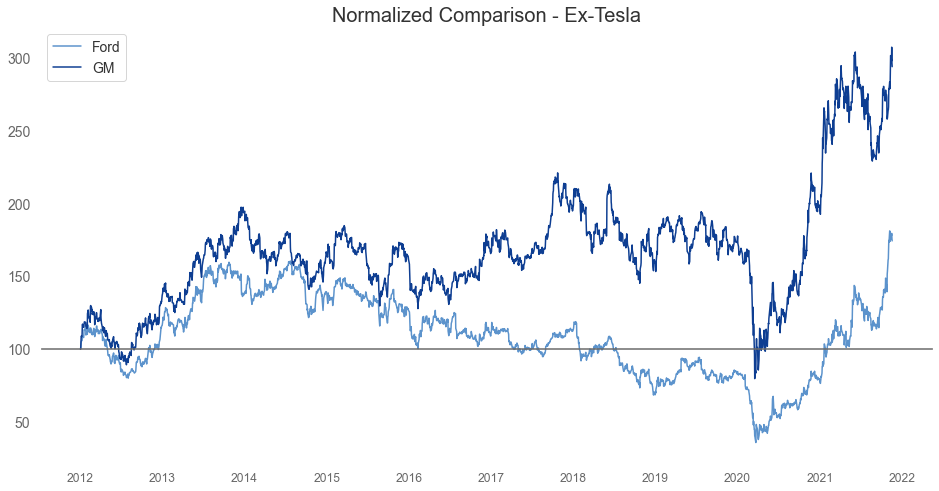

In [51]:
# Plotting the comparison ex-Tesla
plt.plot(ford_open_norm, color = ford_color)
plt.plot(gm_open_norm, color = gm_color)

plt.title('Normalized Comparison - Ex-Tesla', size = 20)
plt.axhline(100, color = 'dimgray')
plt.legend({'Ford': ford_open_norm, 'GM': gm_open_norm}, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(color = 'dimgray')
plt.grid(False)

plt.show()

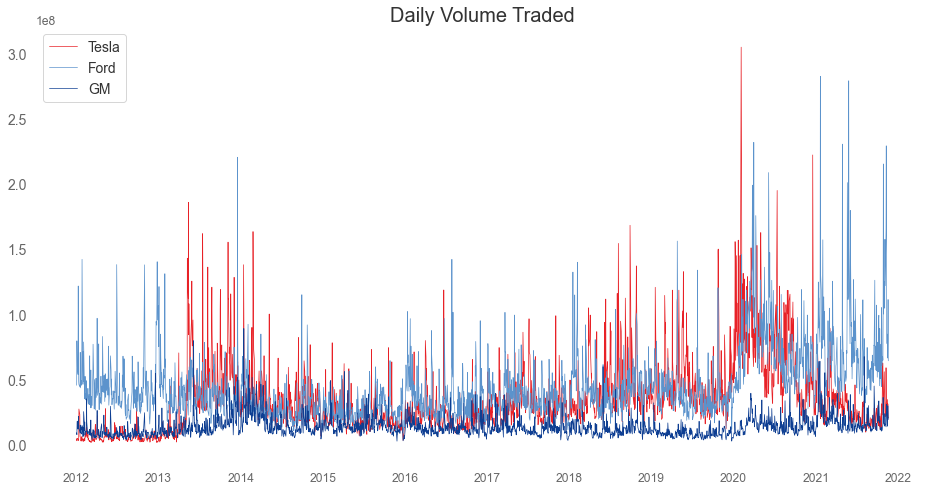

In [52]:
# Comparing each stock's volume traded daily

# Normalization scale for each stock
tsla_volume = tsla['Volume']
ford_volume = ford['Volume']
gm_volume = gm['Volume']

# Plotting the comparison
plt.plot(tsla_volume, color = tesla_color, linewidth = 0.7)
plt.plot(ford_volume, color = ford_color, linewidth = 0.7)
plt.plot(gm_volume, color = gm_color, linewidth = 0.7)

plt.title('Daily Volume Traded', size = 20)
plt.legend({'Tesla': tsla_volume, 'Ford': ford_volume, 'GM': gm_volume}, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(color = 'dimgray')
plt.grid(False)

plt.show()

Not a clear-cut image, but some conclusions can be drawn from it:

- **Tesla** had a significant increase in trading volume of its shares in 2013-2014, probably due to the success of the Model S, which improved the company's long-term prospects in the eyes of the investors. In 2018, another spike in trading volume, which could be tied to the infamous Musk's statements about taking Tesla private.
- **Ford** also had some significant events in this time window. In the end of 2013, a pessimistic guidance about profitability prospects for 2014 contributed to a sharp decline in the company's stock price. In 2021, another round of significant trading volume in Ford's stocks, but this movement seems more prolonged and based on investor's expectations on the company's future performance.    
- **General Motors** low volume traded on its stocks relative to its competitors, even during the toughest moment of the Covid crisis (March 2020).

*The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calculation to try to represent total money traded would be to multiply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series.*

*Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.*

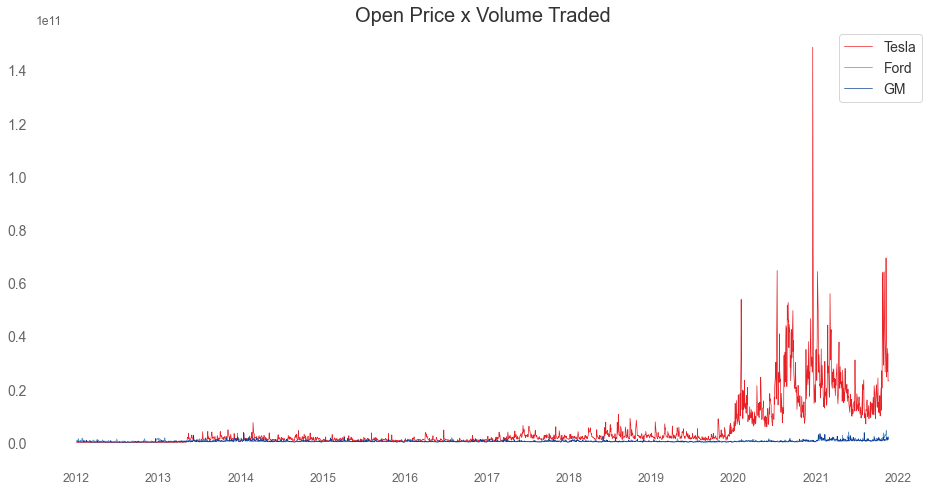

In [53]:
# Creating a column of Open Price multiplied by Volume Traded
tsla['Total Traded'] = tsla['Open'] * tsla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

# Plotting the comparison
plt.plot(tsla['Total Traded'], color = tesla_color, linewidth = 0.7)
plt.plot(ford['Total Traded'], color = ford_color, linewidth = 0.7)
plt.plot(gm['Total Traded'], color = gm_color, linewidth = 0.7)

plt.title('Open Price x Volume Traded', size = 20)
plt.legend({'Tesla': tsla_volume, 'Ford': ford_volume, 'GM': gm_volume}, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(color = 'dimgray')
plt.grid(False)

plt.show()

*Let's practice plotting out some Moving Averages (50 and 200) for GM stock's Open Price.*

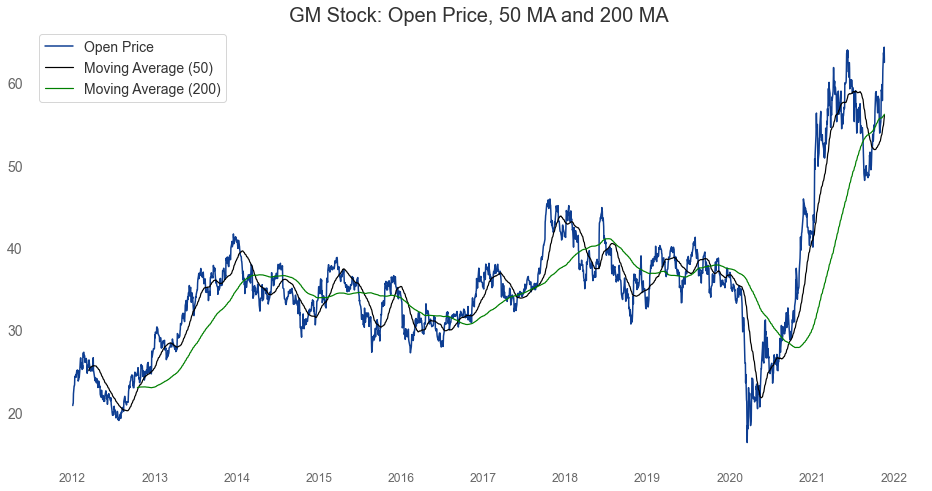

In [54]:
gm['MA_50'] = gm['Open'].rolling(50).mean()
gm['MA_200'] = gm['Open'].rolling(200).mean()

plt.plot(gm['Open'], color = gm_color, linewidth = 1.5)
plt.plot(gm['MA_50'], color = 'black', linewidth = 1.2)
plt.plot(gm['MA_200'], color = 'green', linewidth = 1.2)

plt.title('GM Stock: Open Price, 50 MA and 200 MA', size = 20)
plt.legend({'Open Price': gm['Open'], 'Moving Average (50)': gm['MA_50'], 'Moving Average (200)': gm['MA_200']}, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(color = 'dimgray')
plt.grid(False)

plt.show()

GM stocks' performance post-Covid crisis has been almost literally "off the charts".

*Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot*

In [55]:
# Merging each stock's Open Price in a DataFrame

car_comp = pd.concat([tsla['Open'],ford['Open'],gm['Open']], axis= 1) 
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,5.788,11.00,20.830000
2012-01-04,5.642,11.15,21.049999
2012-01-05,5.552,11.33,21.100000
2012-01-06,5.440,11.74,22.260000
2012-01-09,5.400,11.83,23.200001


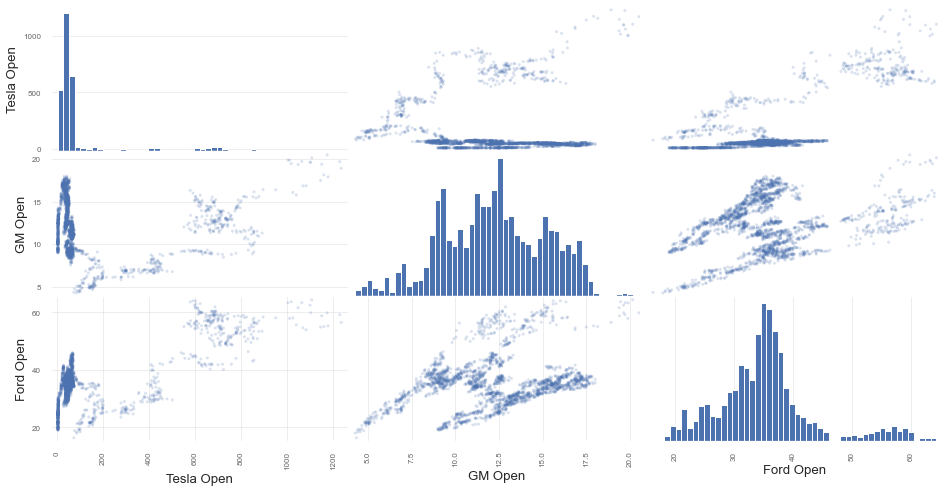

In [56]:
# Plotting the Scatter Matrix

scatter_matrix(car_comp, alpha=0.2, hist_kwds={'bins':50});

---

In [59]:
print(emoji.emojize("This is the first part of the Capstone Project. Stay tuned for more updates :thumbs_up:"))

This is the first part of the Capstone Project. Stay tuned for more updates 👍


---

#### Author: Renan Pereira Bento

[GitHub Profile](https://github.com/renanpbento)

*Thanks for reading this code. I appreciate comments and feedbacks regarding this project.*